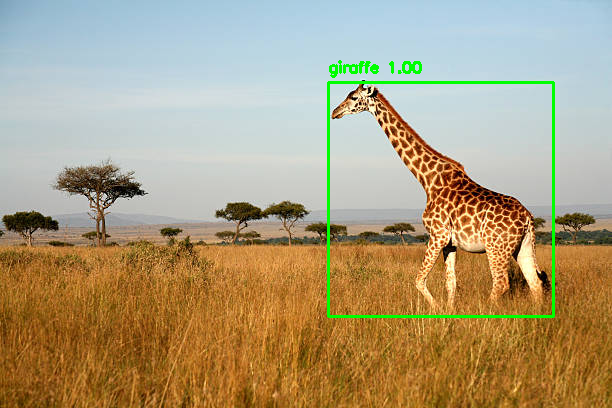

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from torchvision import transforms
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained SSD model
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights)
model.eval()

# Load COCO labels
labels = weights.meta["categories"]

# Image transforms
preprocess = weights.transforms()

# Load and preprocess image
img_path = '/content/giraffe.jpg'  # Make sure this image exists
img = Image.open(img_path).convert("RGB")
input_tensor = preprocess(img).unsqueeze(0)  # shape: [1, 3, 300, 300]

# Predict
with torch.no_grad():
    outputs = model(input_tensor)[0]

# Load image for OpenCV display
img_cv = cv2.imread(img_path)

# Draw boxes for detections above confidence threshold
threshold = 0.5
for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
    if score > threshold:
        x1, y1, x2, y2 = box.int().numpy()
        class_name = labels[label]
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv, f'{class_name} {score:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show result in Colab
cv2_imshow(img_cv)